In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statistics
from sklearn.model_selection import cross_val_score

In [17]:
import os

for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [18]:
import pandas as pd

df_train_original = pd.read_csv('train.csv')
df_train = df_train_original.copy()

<ipython-input-18-ccd7469247ce>:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_original = pd.read_csv('train.csv')


In [19]:
#Check data
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [20]:
print('Data Size : ',df_train.shape)

Data Size :  (100000, 28)


In [21]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [23]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [24]:
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [25]:
class DataCleaner:
    def impute_missing_by_mode(self,df, groupby, column):
        mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iat[0])
        df[column] = df[column].fillna(mode_per_group)

    def normalize_categorical_data(self, df, groupby, column, replace_value=None):
        if replace_value is not None:
            df[column] = df[column].replace(replace_value, np.nan)
        self.impute_missing_by_mode(df, groupby, column)

    def rectify_outliers(self, df, groupby, column):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        mode_results = df_dropped.apply(lambda x: stats.mode(x)[0])
        if not mode_results.empty:
            mini = mode_results.min()
            maxi = mode_results.max()
        else:
            mini, maxi = float('inf'), float('-inf')

        col = df[column].apply(lambda x: np.NaN if ((x<mini) | (x>maxi) | (x<0)) else x)

        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        df[column] = col.fillna(mode_by_group)
        df[column].fillna(df[column].mean(), inplace=True)

    def refine_numeric_data(self, df, groupby, column, strip=None, datatype=None, replace_value=None):
        if replace_value is not None:
            df[column] = df[column].replace(replace_value, np.nan)
        if df[column].dtype == object and strip is not None:
            df[column] = df[column].str.strip(strip)
        if datatype is not None:
            df[column] = df[column].astype(datatype)
        self.rectify_outliers(df, groupby, column)

In [26]:
import matplotlib.pyplot as plt


class DataPlotter:
    def plot_countplot(self, df, column, user_friendly_column_name, rotation=0):
        sns.countplot(data=df, x=column)
        plt.xlabel(f'{user_friendly_column_name}')
        plt.ylabel('Number of Records')
        plt.title(f'{user_friendly_column_name} Distribution')
        plt.xticks(rotation=rotation)
        plt.show()

    def plot_displot(self, df, column, user_friendly_column_name, rotation=0, bins=20):
        sns.displot(data=df, x=column, kde=True, bins=bins)
        plt.xlabel(f'{user_friendly_column_name}')
        plt.ylabel('Number of Records')
        plt.title(f'{user_friendly_column_name} Distribution')
        plt.xticks(rotation=rotation)
        plt.show()

    def plot_stacked_bar(self, df, column1, column2, rotation=0):
        pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)
        plt.xlabel(f'{column1}')
        plt.ylabel('Number of Records')
        plt.title(f'{column1} & {column2} Distribution')
        plt.xticks(rotation=rotation)
        plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score,classification_report,confusion_matrix


class Helper:
    def get_column_details(self, df, column):
        print("Details of",column,"column")
        print("\nDataType: ",df[column].dtype)
        count_null = df[column].isnull().sum()
        if count_null==0:
            print("\nThere are no null values")
        elif count_null>0:
            print("\nThere are ",count_null," null values")
        print("\nNumber of Unique Values: ",df[column].nunique())
        print("\nDistribution of column:\n")
        print(df[column].value_counts())

    def month_converter(self, val):
      if pd.notnull(val):
          years = int(val.split(' ')[0])
          month = int(val.split(' ')[3])
          return (years*12)+month
      else:
          return val

    def display_model_result(self, y_test,y_pred):
      print("Classification Report")
      print(classification_report(y_test, y_pred))

      print("\n---------------------------------------------\n")
      cm = confusion_matrix(y_test, y_pred)

      sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

      plt.xlabel('Predicted Labels')
      plt.ylabel('Actual Labels')
      plt.title('Confusion Matrix')

      plt.show()


In [28]:
plotter = DataPlotter()
helper = Helper();
cleaner = DataCleaner()

In [29]:
#Drop columns with no usable info (except 'Customer_Id' for next steps grouping)
print("Size of Dataset before dropping columns : ",df_train.shape)
drop_columns = ['ID','Name','SSN']
df_train.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df_train.shape)

Size of Dataset before dropping columns :  (100000, 28)
Size of Dataset after dropping columns :  (100000, 25)


Details of Credit_Score column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


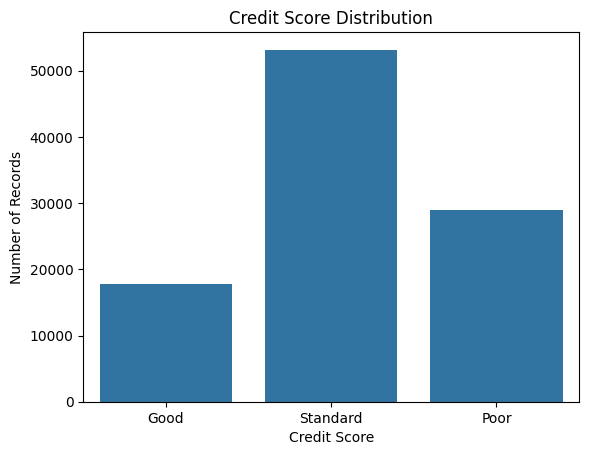

In [30]:
column_name = 'Credit_Score'
user_friendly_name = 'Credit Score'

helper.get_column_details(df_train,column_name)
plotter.plot_countplot(df_train, column_name,user_friendly_name)

In [31]:
helper.get_column_details(df_train,'Customer_ID')

Details of Customer_ID column

DataType:  object

There are no null values

Number of Unique Values:  12500

Distribution of column:

Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64


Details of Month column

DataType:  object

There are no null values

Number of Unique Values:  8

Distribution of column:

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64


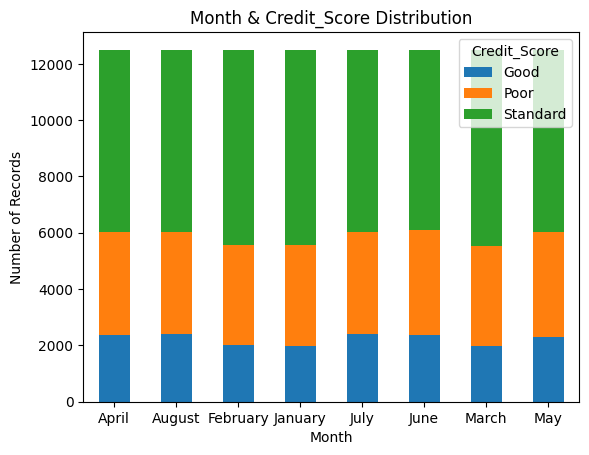

In [32]:
column_name = 'Month'

helper.get_column_details(df_train,column_name)
plotter.plot_stacked_bar(df_train, column_name,'Credit_Score')

In [33]:
#Month to datetime
df_train['Month'] = pd.to_datetime(df_train.Month, format='%B').dt.month

Details of Occupation column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


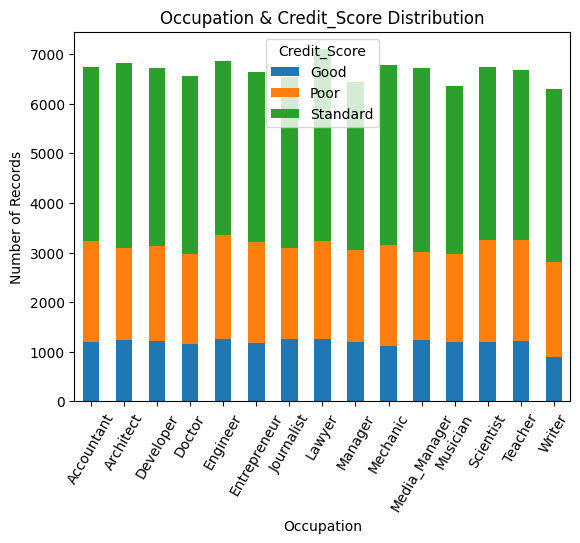

In [34]:
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'
user_friendly_name = 'Occupation'

helper.get_column_details(df_train,column_name)
cleaner.normalize_categorical_data(df_train,group_by,column_name,garbage_value)
plotter.plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

In [35]:
helper.get_column_details(df_train,'Type_of_Loan')

Details of Type_of_Loan column

DataType:  object

There are  11408  null values

Number of Unique Values:  6260

Distribution of column:

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified,

In [36]:
#Handle 'Not Specified' Type of Loan values
df_train['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)

Details of Payment_of_Min_Amount column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64


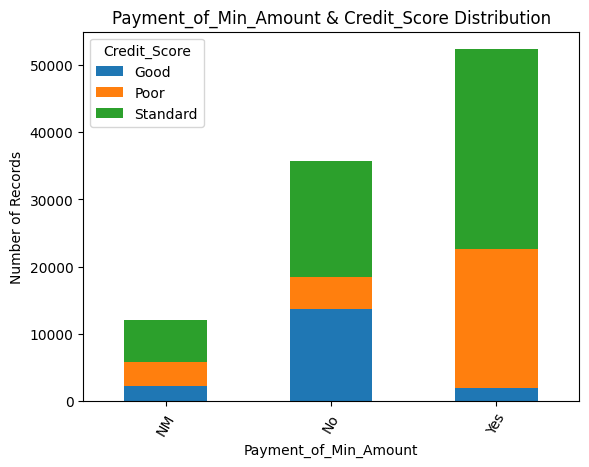

In [37]:
column_name = 'Payment_of_Min_Amount'

helper.get_column_details(df_train,column_name)
plotter.plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

Details of Payment_Behaviour column

DataType:  object

There are no null values

Number of Unique Values:  7

Distribution of column:

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64


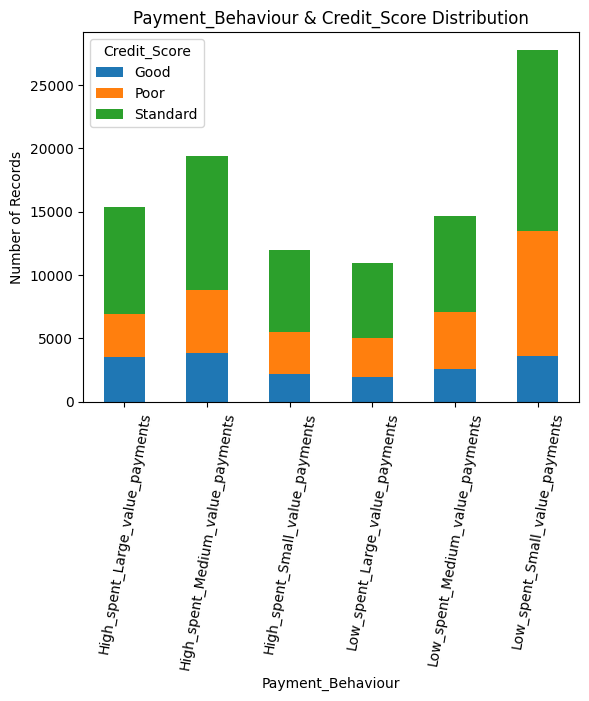

In [38]:
column_name = 'Payment_Behaviour'
group_by = 'Customer_ID'
garbage_value = '!@9#%8'

helper.get_column_details(df_train,column_name)
cleaner.normalize_categorical_data(df_train,group_by,column_name,garbage_value)
plotter.plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=80)

Details of Age column

DataType:  object

There are no null values

Number of Unique Values:  1788

Distribution of column:

Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: count, Length: 1788, dtype: int64


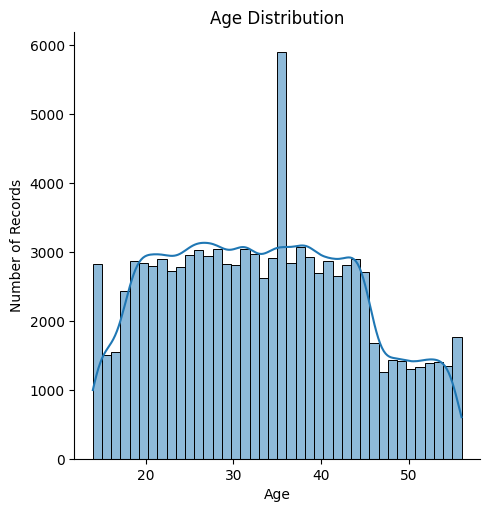

In [39]:
column_name = 'Age'
group_by = 'Customer_ID'
user_friendly_name = 'Age'

helper.get_column_details(df_train,column_name)
cleaner.refine_numeric_data(df_train,group_by,column_name,strip='_',datatype=int)
plotter.plot_displot(df_train,column_name,user_friendly_name,bins=40)

Details of Annual_Income column

DataType:  object

There are no null values

Number of Unique Values:  18940

Distribution of column:

Annual_Income
36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: count, Length: 18940, dtype: int64


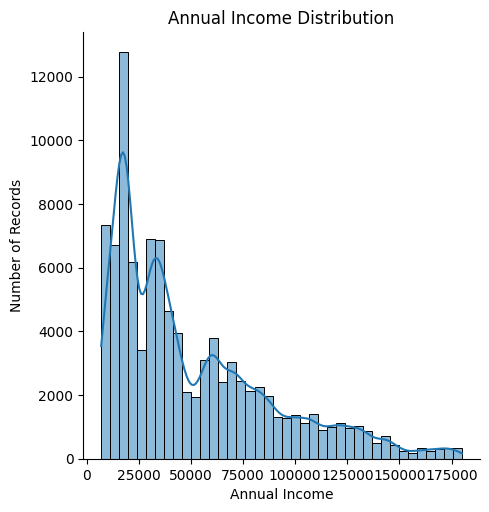

In [40]:
column_name = 'Annual_Income'
group_by = 'Customer_ID'
user_friendly_name = 'Annual Income'

helper.get_column_details(df_train,column_name)
cleaner.refine_numeric_data(df_train,group_by,column_name,strip='_',datatype=float)
plotter.plot_displot(df_train,column_name,user_friendly_name,bins=40)

Details of Monthly_Inhand_Salary column

DataType:  float64

There are  15002  null values

Number of Unique Values:  13235

Distribution of column:

Monthly_Inhand_Salary
6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: count, Length: 13235, dtype: int64


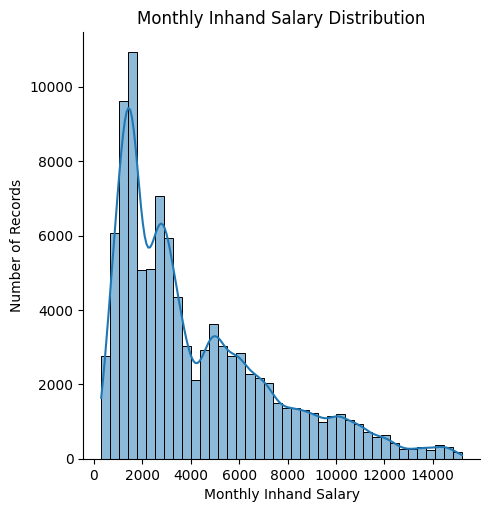

In [41]:
column_name = 'Monthly_Inhand_Salary'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Inhand Salary'

helper.get_column_details(df_train,column_name)
cleaner.refine_numeric_data(df_train,group_by,column_name)
plotter.plot_displot(df_train,column_name,user_friendly_name,bins=40)

Details of Num_Bank_Accounts column

DataType:  int64

There are no null values

Number of Unique Values:  943

Distribution of column:

Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: count, Length: 943, dtype: int64


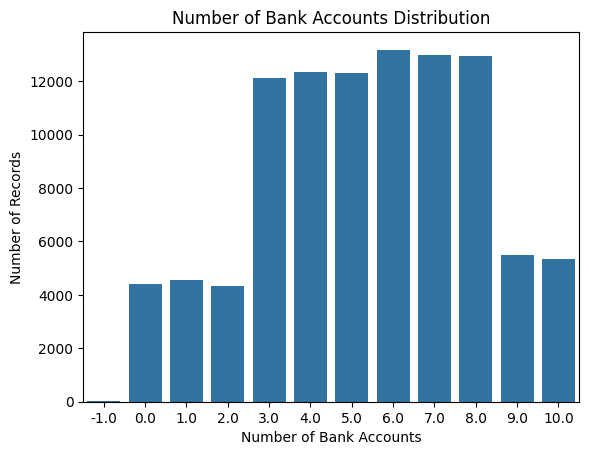

In [42]:
column_name = 'Num_Bank_Accounts'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Bank Accounts'

helper.get_column_details(df_train,column_name)
cleaner.refine_numeric_data(df_train,group_by,column_name)
plotter.plot_countplot(df_train,column_name,user_friendly_name)

Details of Num_Credit_Card column

DataType:  int64

There are no null values

Number of Unique Values:  1179

Distribution of column:

Num_Credit_Card
5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: count, Length: 1179, dtype: int64


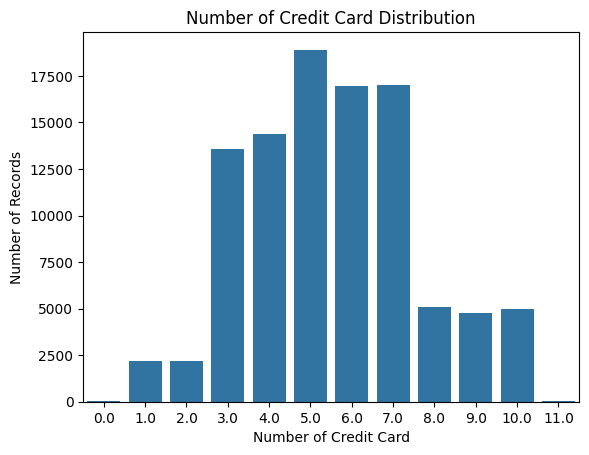

In [43]:
column_name = 'Num_Credit_Card'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Card'

helper.get_column_details(df_train,column_name)
cleaner.refine_numeric_data(df_train,group_by,column_name)
plotter.plot_countplot(df_train,column_name,user_friendly_name)

Details of Interest_Rate column

DataType:  int64

There are no null values

Number of Unique Values:  1750

Distribution of column:

Interest_Rate
8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
4995       1
1899       1
2120       1
5762       1
5729       1
Name: count, Length: 1750, dtype: int64


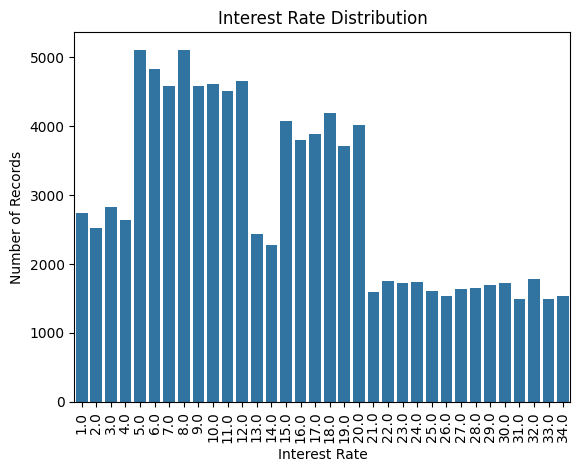

In [44]:
column_name = 'Interest_Rate'
group_by = 'Customer_ID'
user_friendly_name = 'Interest Rate'

helper.get_column_details(df_train,column_name)
cleaner.refine_numeric_data(df_train,group_by,column_name)
plotter.plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

Details of Delay_from_due_date column

DataType:  int64

There are no null values

Number of Unique Values:  73

Distribution of column:

Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: count, Length: 73, dtype: int64


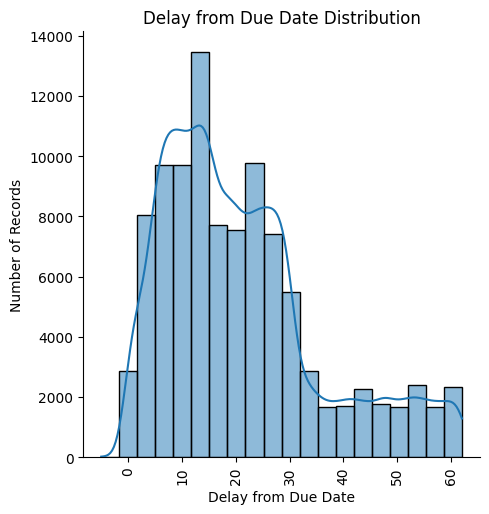

In [45]:
column_name = 'Delay_from_due_date'
group_by = 'Customer_ID'
user_friendly_name = 'Delay from Due Date'

helper.get_column_details(df_train,column_name)
cleaner.refine_numeric_data(df_train,group_by,column_name)
plotter.plot_displot(df_train,column_name,user_friendly_name,rotation=90)

Details of Num_of_Delayed_Payment column

DataType:  object

There are  7002  null values

Number of Unique Values:  749

Distribution of column:

Num_of_Delayed_Payment
19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: count, Length: 749, dtype: int64


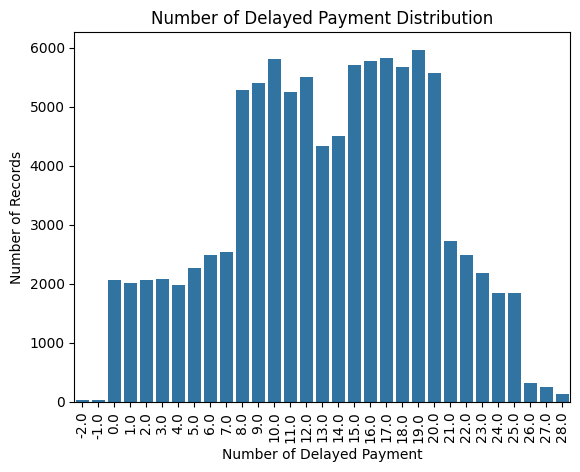

In [46]:
column_name = 'Num_of_Delayed_Payment'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Delayed Payment'

helper.get_column_details(df_train,column_name)
cleaner.refine_numeric_data(df_train,group_by,column_name,strip='_',datatype=float)
plotter.plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

Details of Changed_Credit_Limit column

DataType:  object

There are no null values

Number of Unique Values:  4384

Distribution of column:

Changed_Credit_Limit
_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: count, Length: 4384, dtype: int64


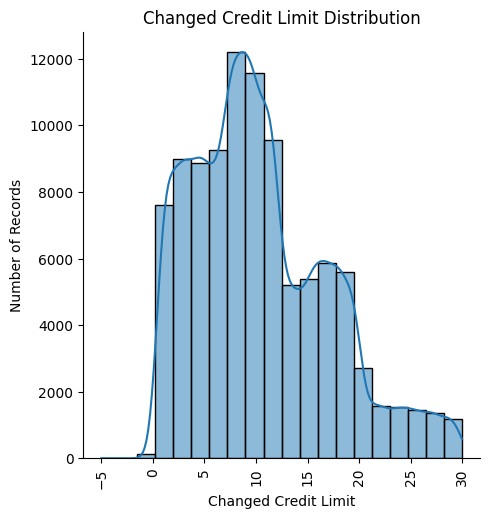

In [47]:
column_name = 'Changed_Credit_Limit'
group_by = 'Customer_ID'
user_friendly_name = 'Changed Credit Limit'

helper.get_column_details(df_train,column_name)
cleaner.refine_numeric_data(df_train,group_by,column_name,strip='_',datatype=float,replace_value='_')
plotter.plot_displot(df_train,column_name,user_friendly_name,rotation=90)

Details of Num_Credit_Inquiries column

DataType:  float64

There are  1965  null values

Number of Unique Values:  1223

Distribution of column:

Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: count, Length: 1223, dtype: int64


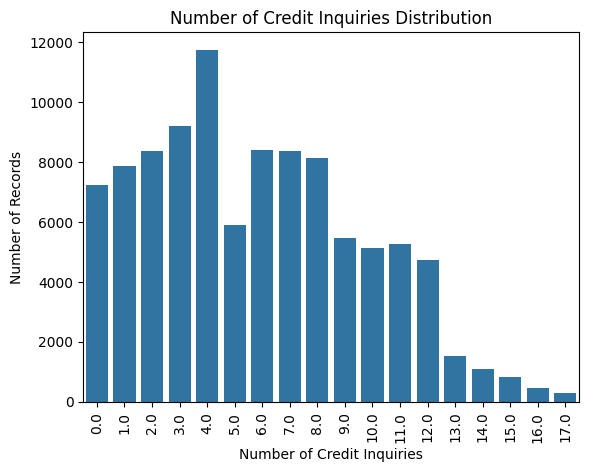

In [48]:
column_name = 'Num_Credit_Inquiries'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Inquiries'

helper.get_column_details(df_train,column_name)
cleaner.refine_numeric_data(df_train,group_by,column_name)
plotter.plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

Details of Outstanding_Debt column

DataType:  object

There are no null values

Number of Unique Values:  13178

Distribution of column:

Outstanding_Debt
1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: count, Length: 13178, dtype: int64


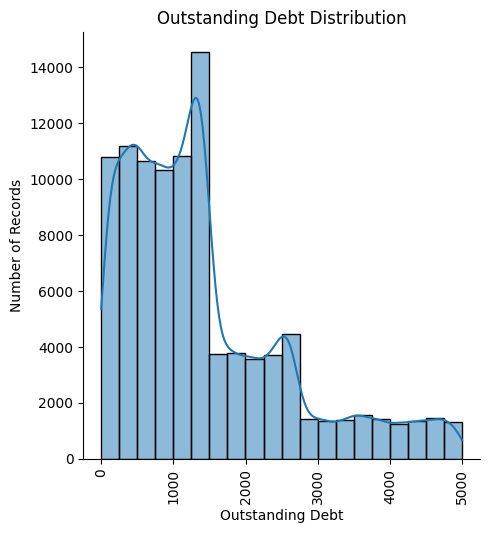

In [49]:
column_name = 'Outstanding_Debt'
group_by = 'Customer_ID'
user_friendly_name = 'Outstanding Debt'

helper.get_column_details(df_train,column_name)
cleaner.refine_numeric_data(df_train,group_by,column_name,strip='_',datatype=float)
plotter.plot_displot(df_train,column_name,user_friendly_name,rotation=90)

Details of Credit_Utilization_Ratio column

DataType:  float64

There are no null values

Number of Unique Values:  100000

Distribution of column:

Credit_Utilization_Ratio
26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: count, Length: 100000, dtype: int64


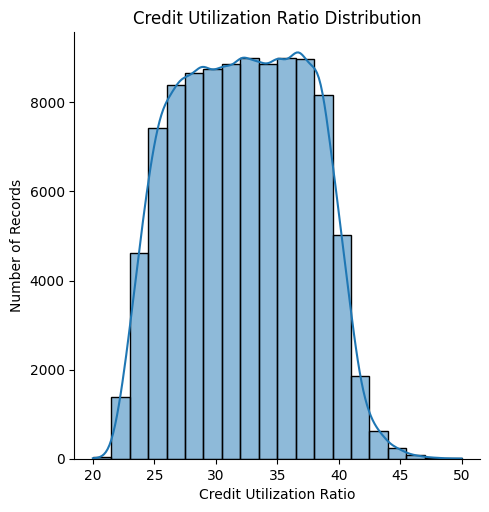

In [50]:
column_name = 'Credit_Utilization_Ratio'
group_by = 'Customer_ID'
user_friendly_name = 'Credit Utilization Ratio'

helper.get_column_details(df_train,column_name)
plotter.plot_displot(df_train,column_name,user_friendly_name)

In [51]:
df_train['Credit_History_Age'].value_counts()

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [52]:
#'Credit_History_Age' type adjustment (converting from string to month number value)
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(lambda x: helper.month_converter(x)).astype(float)

Details of Credit_History_Age column

DataType:  float64

There are  9030  null values

Number of Unique Values:  404

Distribution of column:

Credit_History_Age
191.0    446
232.0    445
233.0    444
215.0    443
231.0    441
        ... 
3.0       20
2.0       15
403.0     14
404.0     12
1.0        2
Name: count, Length: 404, dtype: int64


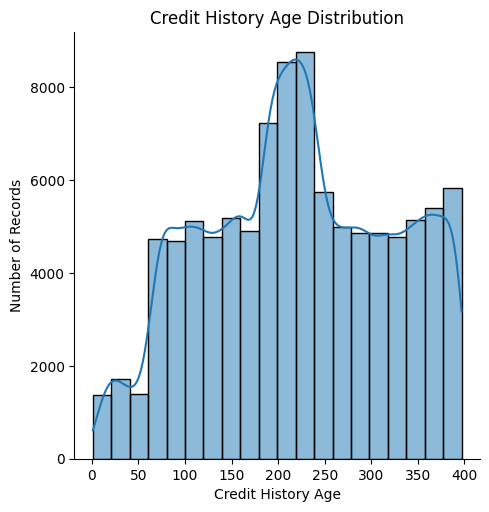

In [53]:
column_name = 'Credit_History_Age'
group_by = 'Customer_ID'
user_friendly_name = 'Credit History Age'

helper.get_column_details(df_train,column_name)
cleaner.refine_numeric_data(df_train,group_by,column_name,datatype=float)
plotter.plot_displot(df_train,column_name,user_friendly_name)

Details of Total_EMI_per_month column

DataType:  float64

There are no null values

Number of Unique Values:  14950

Distribution of column:

Total_EMI_per_month
0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: count, Length: 14950, dtype: int64


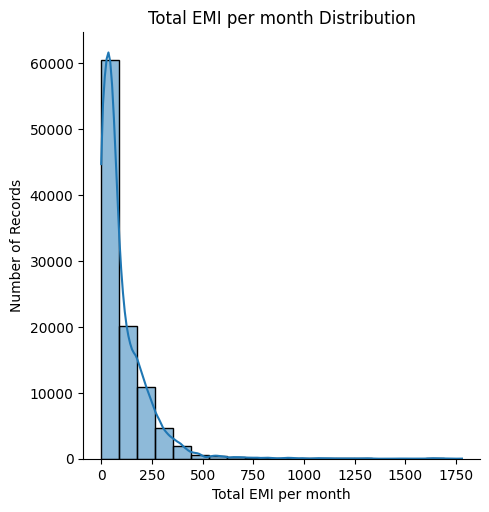

In [54]:
column_name = 'Total_EMI_per_month'
group_by = 'Customer_ID'
user_friendly_name = 'Total EMI per month'

helper.get_column_details(df_train,column_name)
cleaner.refine_numeric_data(df_train,group_by,column_name)
plotter.plot_displot(df_train,column_name,user_friendly_name)

Details of Amount_invested_monthly column

DataType:  object

There are  4479  null values

Number of Unique Values:  91049

Distribution of column:

Amount_invested_monthly
__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: count, Length: 91049, dtype: int64


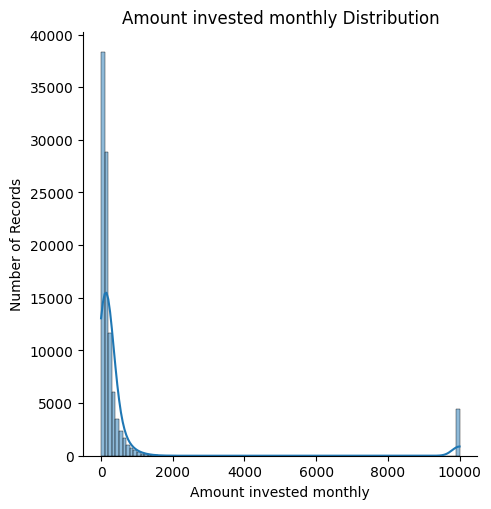

In [55]:
column_name = 'Amount_invested_monthly'
group_by = 'Customer_ID'
user_friendly_name = 'Amount invested monthly'

helper.get_column_details(df_train,column_name)
cleaner.refine_numeric_data(df_train,group_by,column_name,datatype=float,strip='_')
plotter.plot_displot(df_train,column_name,user_friendly_name,bins=100)

Details of Monthly_Balance column

DataType:  object

There are  1200  null values

Number of Unique Values:  98792

Distribution of column:

Monthly_Balance
__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: count, Length: 98792, dtype: int64


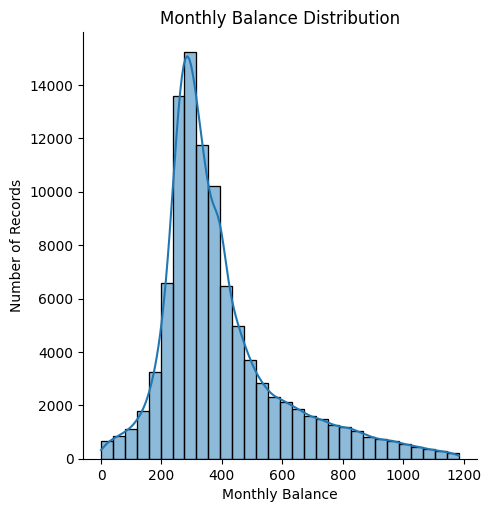

In [56]:
column_name = 'Monthly_Balance'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Balance'

helper.get_column_details(df_train,column_name)
df_train[column_name].replace('',np.nan)
cleaner.refine_numeric_data(df_train,group_by,column_name,strip='_',datatype=float,replace_value='__-333333333333333333333333333__')
plotter.plot_displot(df_train,column_name,user_friendly_name,bins=30)

Details of Num_of_Loan column

DataType:  object

There are no null values

Number of Unique Values:  434

Distribution of column:

Num_of_Loan
3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: count, Length: 434, dtype: int64


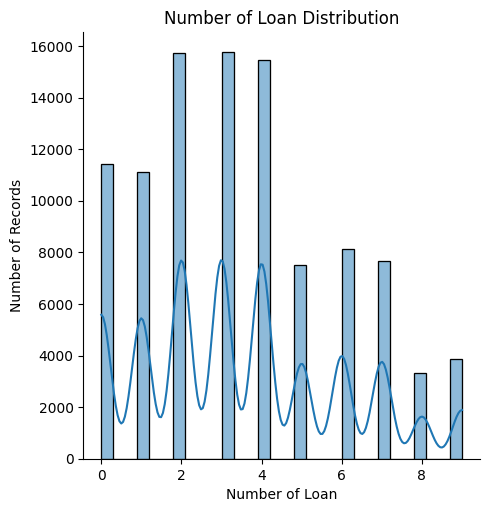

In [57]:
column_name = 'Num_of_Loan'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Loan'

helper.get_column_details(df_train,column_name)
cleaner.refine_numeric_data(df_train,group_by,column_name,strip='_',datatype=float)
plotter.plot_displot(df_train,column_name,user_friendly_name,bins=30)

In [58]:
#Check if null values are still exist in dataset
df_train.isna().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [59]:
# Drop last 'Customer_ID' column because no sense to keep it
print("Size of Dataset before dropping columns : ",df_train.shape)
drop_columns = ['Customer_ID']
df_train.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df_train.shape)

Size of Dataset before dropping columns :  (100000, 25)
Size of Dataset after dropping columns :  (100000, 24)


In [60]:
from sklearn.preprocessing import LabelEncoder

#Define categorial columns names to encode
categorical_columns = ['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
label_encoder = LabelEncoder()

for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])


In [61]:
# Check data before processing
df_train.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,3,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,31.944960,265.0,1,49.574949,118.280222,3,284.629162,0
2,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
4,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0


In [62]:
def add_noise_to_dataframe(df, columns_to_exclude, percentage_of_records, percentage_deviation):
    num_records = int(len(df) * percentage_of_records / 100)
    noised_data = df.sample(n=num_records, replace=True).reset_index(drop=True)

    for column in df.columns:
        if column not in columns_to_exclude:
            noise = np.random.normal(loc=0, scale=abs(noised_data[column].std() * (percentage_deviation / 100)), size=num_records)
            noised_data[column] += noise

    new_df = pd.concat([df, noised_data], ignore_index=True)
    return new_df

df_train = add_noise_to_dataframe(df_train, ['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score'], 20, 7 )

In [63]:
#Split Input & Output Data
X = df_train.drop('Credit_Score',axis=1)
y = df_train['Credit_Score']
print(X.shape)
print(y.shape)

(120000, 23)
(120000,)


In [64]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler

# Normalize Data
#scaler = RobustScaler()
#scaler = MaxAbsScaler()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [65]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=17,stratify=y_sm)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# adasyn = ADASYN()
# X_sm, y_sm = adasyn.fit_resample(X, y)

# y_sm.value_counts()

# X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=17,stratify=y_sm)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

(153103, 23)
(38276, 23)
(153103,)
(38276,)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ....................n_estimators=50, random_state=4; total time=  48.9s
[CV] END ....................n_estimators=50, random_state=4; total time=  41.5s
[CV] END ....................n_estimators=50, random_state=4; total time=  42.7s
[CV] END ....................n_estimators=50, random_state=4; total time=  41.0s
[CV] END ....................n_estimators=50, random_state=4; total time=  41.4s
[CV] END ...................n_estimators=50, random_state=10; total time=  41.5s
[CV] END ...................n_estimators=50, random_state=10; total time=  41.8s
[CV] END ...................n_estimators=50, random_state=10; total time=  41.7s
[CV] END ...................n_estimators=50, random_state=10; total time=  41.0s
[CV] END ...................n_estimators=50, random_state=10; total time=  41.7s
[CV] END ...................n_estimators=50, random_state=42; total time=  41.6s
[CV] END ...................n_estimators=50, rand

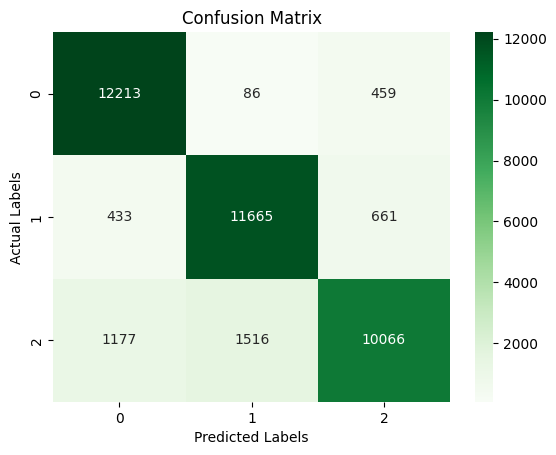

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=4)

param_grid = {
    'n_estimators': [50, 70, 100],
    'random_state': [4, 10, 42]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)
y_pred = grid_search.predict(X_test)
helper.display_model_result(y_test, y_pred)

Base Classifiers:
Ensemble Classifiers:
Classifier: Random Forest
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     12758
           1       0.88      0.91      0.90     12759
           2       0.90      0.79      0.84     12759

    accuracy                           0.89     38276
   macro avg       0.89      0.89      0.88     38276
weighted avg       0.89      0.89      0.88     38276


---------------------------------------------



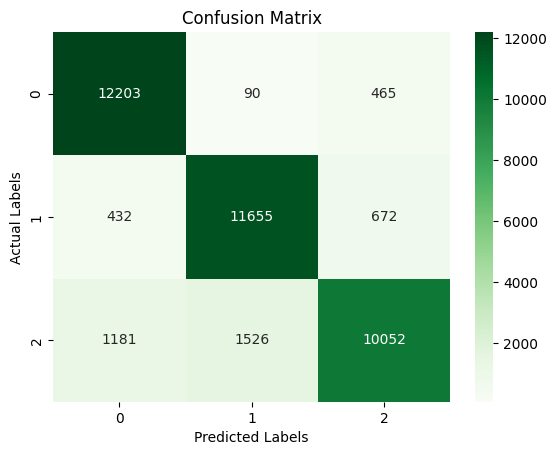

-----------------------
Boosting Classifiers:


In [73]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

ensemble_classifiers = [
    ('Random Forest', RandomForestClassifier(n_estimators=80, random_state=4)),
    # ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=4)),
    # ('AdaBoost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=4))
]

# boosting_classifiers = [
#     ('XGBoost', XGBClassifier(n_estimators=100, random_state=4)),
#     ('LightGBM', LGBMClassifier(n_estimators=100, random_state=4))
# ]

# base_classifiers = [
#     ('Decision Tree', DecisionTreeClassifier(random_state=4)),
#     ('KNN', KNeighborsClassifier(n_neighbors=5)),
#     ('Gaussian NB', GaussianNB()),
#     ('Logistic Regression', LogisticRegression())
# ]



def run_classifiers(classifiers, X_train, y_train, X_test, y_test):
    for clf_name, clf in classifiers:
        print(f'Classifier: {clf_name}')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        helper.display_model_result(y_test, y_pred)
        print('-----------------------')


print("Base Classifiers:")
#run_classifiers(base_classifiers, X_train, y_train, X_test, y_test)

print("Ensemble Classifiers:")
run_classifiers(ensemble_classifiers, X_train, y_train, X_test, y_test)

print("Boosting Classifiers:")
#run_classifiers(boosting_classifiers, X_train, y_train, X_test, y_test)